## Model Evaluation

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
clf = LogisticRegression(max_iter = 1000)
clf.fit(X,y)

LogisticRegression(max_iter=1000)

In [2]:
predicted = clf.predict(X)

In [3]:
(predicted == y).sum() / len(y)

0.9733333333333334

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, y)

0.9733333333333334

In [5]:
from sklearn.metrics import confusion_matrix
m =  confusion_matrix(y, predicted)
m

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

<Axes: >

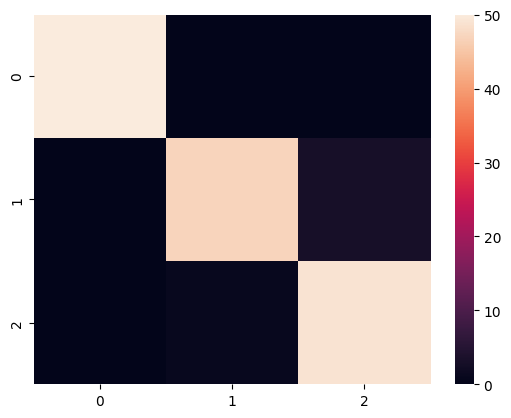

In [6]:
import seaborn
seaborn.heatmap(m)

In [7]:
import pandas
pandas.Series(iris.target).value_counts()

0    50
1    50
2    50
dtype: int64

In [8]:
from sklearn.metrics import classification_report
report = classification_report(y, predicted)

In [9]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



## Training & Testing Data

In [10]:
from sklearn.datasets import load_iris
X = iris.data
y = iris.target

In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 123)



In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier()

In [13]:
predicted = clf.predict(test_X)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.96

In [15]:
confusion_matrix(test_y, predicted)

array([[20,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 17]])

## KFold

In [16]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

accs = []
for train, test in kf.split(X):
    train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]

    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    acc = accuracy_score(test_y, predicted)
    accs.append(acc)

In [18]:
import numpy as np
np.array(accs).mean(),np.array(accs).std()

(0.9266666666666665, 0.09165151389911681)

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

accs = []
for train, test in kf.split(X):
    train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]

    clf = DecisionTreeClassifier(max_depth = 2)
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    acc = accuracy_score(test_y, predicted)
    accs.append(acc)

In [20]:
np.array(accs).mean(),np.array(accs).std()

(0.9333333333333333, 0.07888106377466153)

In [21]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
acc = cross_val_score(clf, X=iris.data, y= iris.target, cv= 10)
acc

acc.mean(), acc.std()


(0.96, 0.044221663871405324)

In [22]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(max_depth= 2)
acc = cross_val_score(clf, X=iris.data, y= iris.target, cv= 10)
acc

acc.mean(), acc.std()


(0.9533333333333334, 0.052068331172711015)

## ROC Curve

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)
clf = LogisticRegression(max_iter = 1000)
clf.fit(train_X,train_y)

LogisticRegression(max_iter=1000)

In [24]:
clf.predict(test_X)

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1])

In [25]:
#clf.predict_proba(test_X)
np.argmax(clf.predict_proba(test_X), axis = 1)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [26]:
predicted = (clf.predict_proba(test_X)[:,1] > 0.5).astype(int) + 1
confusion_matrix(test_y, predicted)

array([[11,  1],
       [ 0,  8]])

In [27]:
FPR = 1 / (1 + 8)
TPR = 11/ (11 + 0)
FPR, TPR

(0.1111111111111111, 1.0)

In [28]:
predicted = (clf.predict_proba(test_X)[:,1] > 0.7).astype(int) + 1
confusion_matrix(test_y, predicted)
FPR = 0 / (0 + 4)
TPR = 12 / (12 + 4)
FPR, TPR

(0.0, 0.75)

In [29]:
# TP FP
# FN TN

# FPR : FP / (FP + TN)
# TPR : TP / (TP + FN)

In [41]:
X = iris.data[50:,:]
y = iris.target[50:]

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [43]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 123)

In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_X, train_y)

LogisticRegression()

In [45]:
predicted = clf.predict_proba(test_X)[:,1]
predicted_y = (predicted > 0.5).astype(int)
m = confusion_matrix(test_y, predicted_y)
TP = m[0,0]
FP = m[0,1]
FN = m[1,0]
TN = m[1,1]
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)
FPR, TPR

(0.07142857142857142, 0.8421052631578947)

In [46]:
FPR_ary = [1]
TPR_ary = [1]
for threshold in np.arange(0,1,0.1):
  #print(threshold)
  predicted_y = (predicted > threshold).astype(int)
  m = confusion_matrix(test_y, predicted_y)
  #if len(m) > 0:
  TP = m[0,0]
  FP = m[0,1]
  FN = m[1,0]
  TN = m[1,1]

  FPR = FP / (FP + TN)
  TPR = TP / (TP + FN)
  if (not np.isnan(FPR)) and (not np.isnan(TPR)):
    FPR_ary.append(FPR)
    TPR_ary.append(TPR)
FPR_ary.append(0)
TPR_ary.append(0)

<ipython-input-46-377e95a1b3a8>:14: RuntimeWarning: invalid value encountered in long_scalars
  TPR = TP / (TP + FN)


In [47]:
FPR_ary, TPR_ary

([1,
  0.36,
  0.15789473684210525,
  0.058823529411764705,
  0.0625,
  0.07142857142857142,
  0.07692307692307693,
  0.0,
  0.0,
  0.0,
  0],
 [1,
  1.0,
  1.0,
  1.0,
  0.9411764705882353,
  0.8421052631578947,
  0.8,
  0.8095238095238095,
  0.7391304347826086,
  0.6538461538461539,
  0])

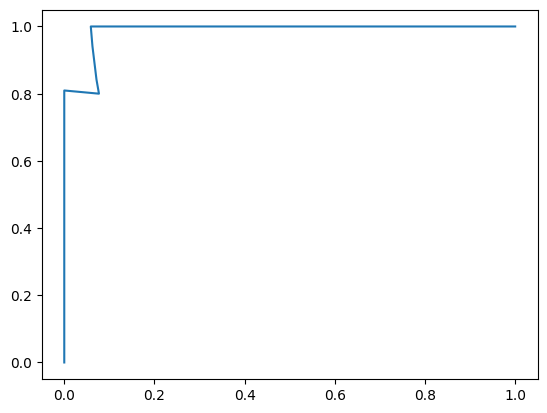

In [48]:
from matplotlib import pyplot as plt
plt.plot(FPR_ary, TPR_ary)

In [51]:
from sklearn.metrics import roc_curve
predicted_y = clf.predict_proba(test_X)[:,1]
#predicted_y
fpr, tpr, thresholds = roc_curve(test_y, predicted_y)

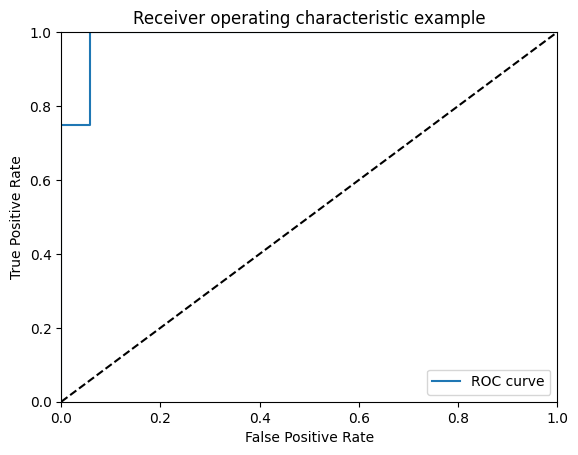

In [52]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [53]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9852941176470588

## Model Comparison

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_y)

GradientBoostingClassifier()

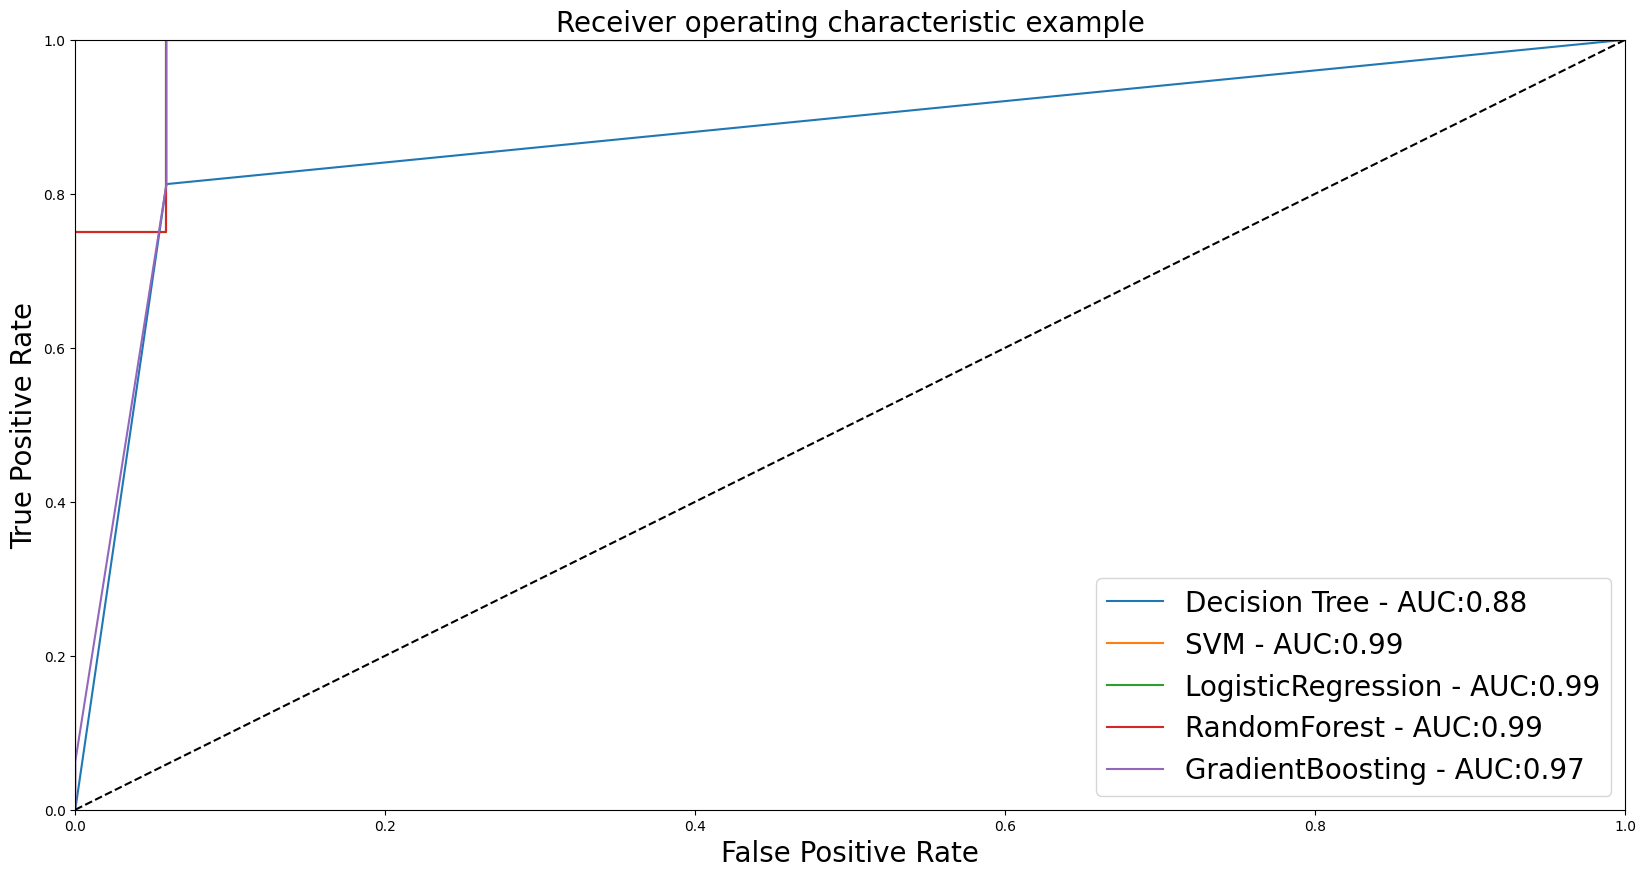

In [55]:
plt.figure(figsize= [20,10])

for clf, title in zip([clf1, clf2, clf3, clf4, clf5],
                      ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GradientBoosting']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()


## 練習題 1
當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可降低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/Creditability.csv)


請用Python 回答以下問題

- 請使用 train_test_split 將資料切割成為 80 % 的訓練資料集, 20% 的測試資料集
- 運用 logistic regression 對訓練資料集建立模型後
- 將 模型套用於測試資料集，並且計算出:

1. 準確率
2. Confusion Matrix
3. F1 Score
4. ROC Curve


In [38]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/Creditability.csv', index_col = 0)
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,...,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,...,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,...,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,...,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,...,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,...,2,2,30,2,2,2,1,1,1,1


## Customer Churn

### 載入資料

In [58]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/customer_churn.csv', index_col = 0 )
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 資料預處理

In [59]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [61]:
df.select_dtypes('object').head()

,state,area_code,international_plan,voice_mail_plan,churn
1,KS,area_code_415,no,yes,no
2,OH,area_code_415,no,yes,no
3,NJ,area_code_415,no,no,no
4,OH,area_code_408,yes,no,no
5,OK,area_code_415,yes,no,no


In [62]:
df = df.iloc[:,3:]

In [63]:
df.select_dtypes('object').head()

,international_plan,voice_mail_plan,churn
1,no,yes,no
2,no,yes,no
3,no,no,no
4,yes,no,no
5,yes,no,no


In [64]:
df['international_plan'].unique()

array(['no', 'yes'], dtype=object)

In [65]:
df['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [66]:
df['churn'].unique()

array(['no', 'yes'], dtype=object)

In [67]:
#df['international_plan'].map(lambda e:  1 if e == 'yes' else 0)
df['international_plan'] = df['international_plan'].replace({'yes':1, 'no':0})
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes':1, 'no':0})
df['churn'] = df['churn'].replace({'yes':1, 'no':0})

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             3333 non-null   int64  
 1   voice_mail_plan                3333 non-null   int64  
 2   number_vmail_messages          3333 non-null   int64  
 3   total_day_minutes              3333 non-null   float64
 4   total_day_calls                3333 non-null   int64  
 5   total_day_charge               3333 non-null   float64
 6   total_eve_minutes              3333 non-null   float64
 7   total_eve_calls                3333 non-null   int64  
 8   total_eve_charge               3333 non-null   float64
 9   total_night_minutes            3333 non-null   float64
 10  total_night_calls              3333 non-null   int64  
 11  total_night_charge             3333 non-null   float64
 12  total_intl_minutes             3333 non-null   f

### 將資料切分為訓練與測試資料集

In [69]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]

In [70]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 42)

### 建立模型

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression(max_iter = 2000)
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_y)

GradientBoostingClassifier()

### 評估模型

In [77]:
predicted_y = clf5.predict(test_X)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(test_y, predicted_y)

0.95

In [79]:
confusion_matrix(test_y, predicted_y)

array([[930,  10],
       [ 45, 115]])

In [80]:
print(classification_report(test_y, predicted_y))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       940
           1       0.92      0.72      0.81       160

    accuracy                           0.95      1100
   macro avg       0.94      0.85      0.89      1100
weighted avg       0.95      0.95      0.95      1100



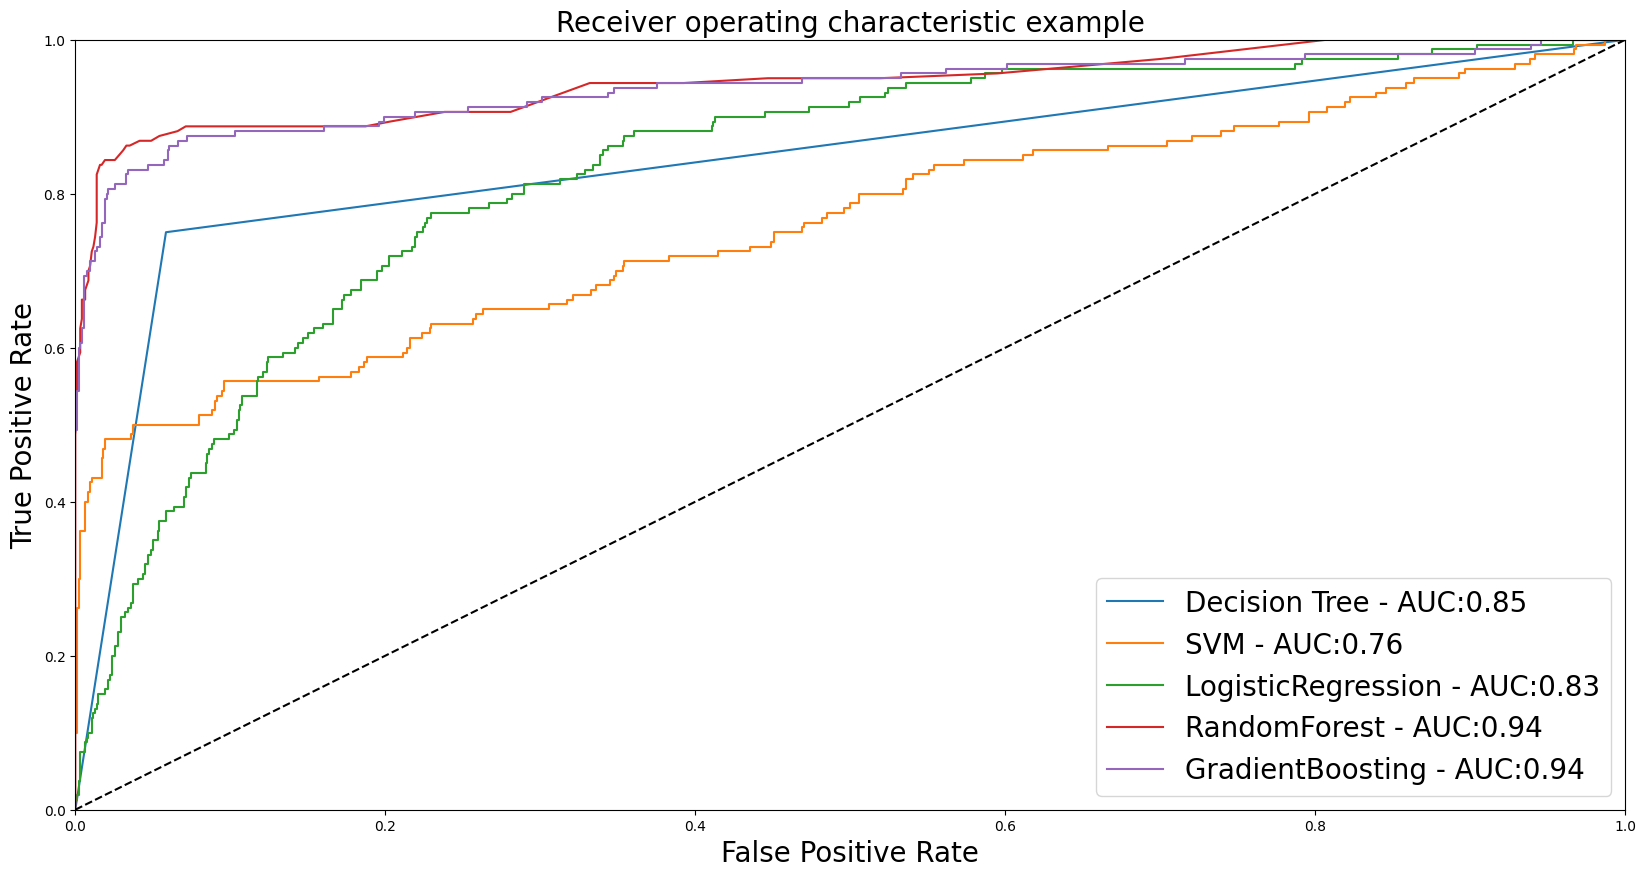

In [81]:
plt.figure(figsize= [20,10])

for clf, title in zip([clf1, clf2, clf3, clf4, clf5],
                      ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GradientBoosting']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()


## Regression Model Evaluation

### 載入資料

In [83]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/rent_591_sample.csv',index_col=0)
df.head()

,id,address,floor,allfloor,layout,area,price,browsenum_all
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,"60,000",751
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,"100,000",162
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"150,000",2385
3,6043839,永康街23巷永康商圈..,3,4,2房1廳1衛,18.0,"29,000",1323
4,5181793,雲和街師大*已收訂..,5,5,2房2廳1衛,28.0,"31,800",2303


### 資料預處理

In [84]:
df['price'] = df['price'].map(lambda e: int(e.replace(',','')))
df[['bedroom', 'livingroom', 'bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')
df = df[['floor', 'allfloor', 'area', 'browsenum_all', 'bedroom', 'livingroom', 'bathroom', 'price']]
df.dropna(inplace=True)
df.head()

<ipython-input-84-5eeb0d047311>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,floor,allfloor,area,browsenum_all,bedroom,livingroom,bathroom,price
0,5,5,46.8,751,5,3,3,60000
1,7,12,76.9,162,4,2,2,100000
2,10,13,71.3,2385,4,2,2,150000
3,3,4,18.0,1323,2,1,1,29000
4,5,5,28.0,2303,2,2,1,31800


### 將資料分為訓練與測試資料集

In [85]:
y  = df.iloc[:,-1]
X  = df.iloc[:,:-1]

In [86]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 42)

### 建立模型

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

clf1 = DecisionTreeRegressor()
clf1.fit(train_X, train_y)

clf2 = SVR()
clf2.fit(train_X, train_y)

clf3 = LinearRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestRegressor()
clf4.fit(train_X, train_y)

clf5 = GradientBoostingRegressor()
clf5.fit(train_X, train_y)

GradientBoostingRegressor()

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
for model, title in zip([clf1, clf2, clf3, clf4, clf5],
                 ['DecisionTree', 'SVM', 'LinearRegression', 'RandomForest', 'GradientBoosting']):
  predicted_y = model.predict(test_X)
  mse = mean_squared_error(test_y, predicted_y)
  r2 = r2_score(test_y, predicted_y)
  print(f'title: {title}, mse: {mse}, r2: {r2}')

title: DecisionTree, mse: 612033767.7829788, r2: 0.5872342055108941
title: SVM, mse: 1734226034.8049667, r2: -0.16959100095566937
title: LinearRegression, mse: 493788606.95249164, r2: 0.6669807167720094
title: RandomForest, mse: 322557549.708913, r2: 0.7824618014846705
title: GradientBoosting, mse: 361658023.26222795, r2: 0.7560917891083971


## 練習題 2
當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可降低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv)

包含客戶特徵

- Account Balance(帳戶餘額): 沒有帳號(1), 沒有餘額 (2), 部分存款 (3)
- Payment Status(付款狀況): 有問題 (1), 付清 (2), 於該銀行沒有問題(3)
- Savings/Stock Value (存款): 沒有, 少於 100, 100 ~ 1,000, 高於1,000
- Employment Length(工作長短): 少於 1 年, 1 ~ 4年, 4 ~ 7年, 高於 7 年
- Sex/Marital Status(性別與婚姻): 男生/女生, 單身/離婚/已婚/鰥夫
- No of Credits at this bank(貸款數): 1, >1
- Guarantor(保人): None, Yes
- Concurrent Credits(其他貸款數): 其他銀行或百貨, None
- ForeignWorker (外國工作者)
- Purpose of Credit(貸款目的): New car, Used car, Home Related, Other

預測目標

- Creditability (可信客戶): 1/0

請用Python 回答以下問題

- 使用Pandas 將資料讀取到一名為 df 的 DataFrame 中
- 請將資料分為訓練與測試資料集,其中訓練資料集占80%, 測試資料- 集占20%
- 請使用邏輯式迴歸建立模型 (目標 y 為 Creditability)
- 請使用隨機森林建立模型 (目標 y 為 Creditability)
- 請繪製隨機森林模型與的邏輯式迴歸 ROC Curve, 並比較兩者的 AUC?


## Model Persistence

In [89]:
from joblib import dump, load
dump(clf, 'multiNB.joblib')

['multiNB.joblib']

In [90]:
clf2 = load('multiNB.joblib')

In [91]:
import pickle
with open('clf.pickle', 'wb') as f:
  f.write(pickle.dumps(clf))


## Feature Selection

In [92]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/python_for_data_science/master/Data/customer_behavior.csv')

In [93]:
from sklearn.feature_selection import VarianceThreshold
X = df.iloc[:,:-1]
sel = VarianceThreshold()
X_val = sel.fit_transform(X)

In [94]:
sel.get_support()

array([False,  True,  True,  True])

In [95]:
from sklearn.feature_selection import SelectKBest, chi2
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
clf = SelectKBest(chi2, k = 2)
clf.fit(X,y)

SelectKBest(k=2, score_func=<function chi2 at 0x793669631090>)

In [96]:
clf.scores_

array([   0.        ,    0.        ,    4.48447205, 2766.66666667])

In [97]:
from sklearn.feature_selection import SelectKBest, chi2
X = iris.data
y = iris.target
clf = SelectKBest(chi2, k = 2)
clf.fit(X,y)

SelectKBest(k=2, score_func=<function chi2 at 0x793669631090>)

In [98]:
clf.scores_

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

## RFE

In [99]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/python_for_data_science/master/Data/customer_behavior.csv')

In [100]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVC
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
clf = SVC(kernel = 'linear')
rfe = RFE(clf, n_features_to_select = 1)
rfe.fit(X,y)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=1)

In [101]:
rfe.ranking_

array([4, 3, 2, 1])

In [102]:
rfe.support_

array([False, False, False,  True])

## Feature Importance (RandomForest)

In [103]:
from sklearn.ensemble import RandomForestClassifier
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
rfe = RandomForestClassifier()
rfe.fit(X,y)

RandomForestClassifier()

In [104]:
rfe.feature_importances_

array([0.        , 0.017858  , 0.29995065, 0.68219135])

([<matplotlib.axis.XTick at 0x793668f368c0>,
 [Text(0, 0, 'bachelor'),
  Text(1, 0, 'gender'),
  Text(2, 0, 'age'),
  Text(3, 0, 'salary')])

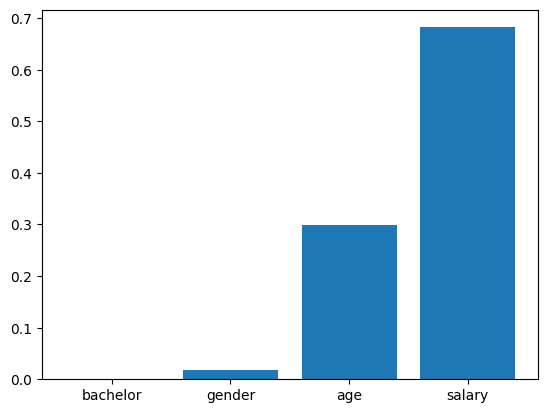

In [105]:
plt.bar(range(len(rfe.feature_importances_)),rfe.feature_importances_)
plt.xticks(range(len(rfe.feature_importances_)), X.columns)

## PCA (Principal Component Analysis)

In [106]:
from sklearn.datasets import load_iris

iris = load_iris()

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(iris.data)

PCA(n_components=2)

In [108]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [109]:
X_reduced = pca.transform(iris.data)

In [110]:
X_reduced[0:3,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

In [111]:
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))


0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


Text(0, 0.5, 'Petal Width')

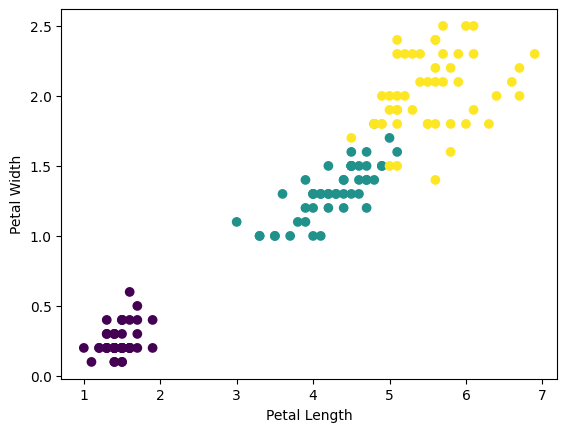

In [112]:
plt.scatter(iris.data[:,2],iris.data[:,3], c = iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Component2')

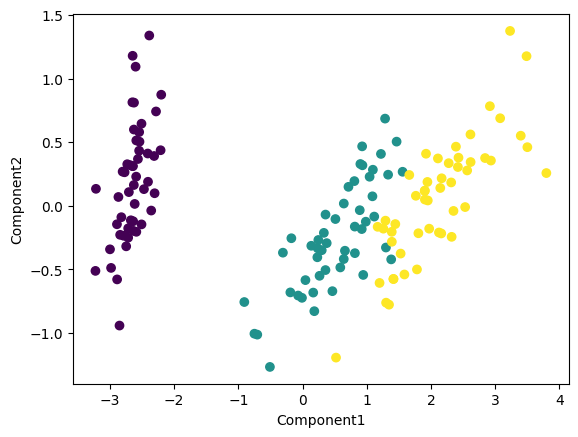

In [113]:
plt.scatter(X_reduced[:,0],X_reduced[:,1], c = iris.target)
plt.xlabel('Component1')
plt.ylabel('Component2')

In [114]:
pca.explained_variance_

array([4.22824171, 0.24267075])

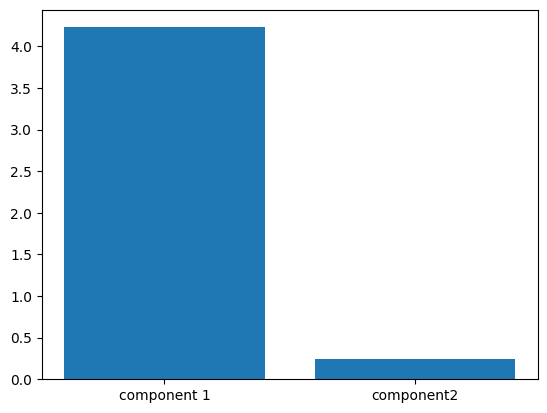

In [115]:
plt.bar(range(0,2), pca.explained_variance_)
plt.xticks(range(0,2), ['component 1', 'component2'])
plt.show()


## Lending Club
- https://drive.google.com/open?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo

In [116]:
! gdown https://drive.google.com/uc?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo
! unzip LoanStats3b.csv.zip > 1.log
! head LoanStats3b.csv

Downloading...
From: https://drive.google.com/uc?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo
To: /content/LoanStats3b.csv.zip
100% 36.6M/36.6M [00:00<00:00, 54.3MB/s]
Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_c

### 讀取資料

In [117]:
import pandas
dataset = pandas.read_csv('LoanStats3b.csv', skiprows=[0])

<ipython-input-117-35ca3734d051>:2: DtypeWarning: Columns (0,47,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pandas.read_csv('LoanStats3b.csv', skiprows=[0])


### 資料前處理
- 必須是結構化資料 (DataFrame)
- 沒有 Missing Value
    - 刪除包含Missing Value 的欄位
    - 利用平均值去補齊資料
    - 利用推論方法，推論該Missing Value 的值
- 所有的資料必須是數值
    - 建立 Dummy Variable

In [118]:
dataset.isna().sum()

id                       188181
member_id                188183
loan_amnt                     2
funded_amnt                   2
funded_amnt_inv               2
                          ...  
settlement_status        186132
settlement_date          186132
settlement_amount        186132
settlement_percentage    186132
settlement_term          186132
Length: 145, dtype: int64

In [119]:
dataset.isna().sum() < 10000

id                       False
member_id                False
loan_amnt                 True
funded_amnt               True
funded_amnt_inv           True
                         ...  
settlement_status        False
settlement_date          False
settlement_amount        False
settlement_percentage    False
settlement_term          False
Length: 145, dtype: bool

In [120]:
import numpy as np
import pandas
np.where((dataset.isna().sum() / len(dataset)) > 0.9)

(array([  0,   1,  18,  29,  47,  53,  54,  55,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  71,  72,  73, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 139, 140, 141, 142, 143,
        144]),)

In [121]:
dataset = dataset.iloc[:,2:111]

In [122]:
empty_cols = [i for i in range(45,72)]
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)

In [123]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan], dtype=object)

In [124]:
dataset = dataset [ dataset['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [125]:
dataset.isna().sum().sort_values(ascending= False)

url                               188171
mths_since_last_record            170698
mths_since_recent_bc_dlq          151423
mths_since_recent_revol_delinq    133728
mths_since_last_delinq            107568
                                   ...  
revol_bal                              0
pub_rec                                0
open_acc                               0
inq_last_6mths                         0
recoveries                             0
Length: 82, dtype: int64

In [126]:
del_col_names = ["delinq_2yrs", "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title",
"term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line",
"initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m",
"num_accts_ever_120_pd", "delinq_amnt",
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"]

In [127]:
dataset = dataset.drop(labels = del_col_names, axis = 1)

In [128]:
dataset.isna().sum().sort_values(ascending= False)

url                               188171
mths_since_last_record            170698
mths_since_recent_bc_dlq          151423
mths_since_recent_revol_delinq    133728
mths_since_last_delinq            107568
desc                              106697
mo_sin_old_il_acct                 33872
pct_tl_nvr_dlq                     27894
mths_since_recent_inq              27867
avg_cur_bal                        27747
mo_sin_rcnt_rev_tl_op              27742
mo_sin_old_rev_tl_op               27742
num_actv_rev_tl                    27741
num_bc_tl                          27741
num_il_tl                          27741
num_actv_bc_tl                     27741
num_op_rev_tl                      27741
num_rev_accts                      27741
num_rev_tl_bal_gt_0                27741
num_tl_op_past_12m                 27741
tot_hi_cred_lim                    27741
mo_sin_rcnt_tl                     27741
total_il_high_credit_limit         27741
num_bc_sats                        16055
num_sats        

In [129]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] #'sub_grade' #selecting final features #'addr_state''tax_liens',
Final_data = dataset[features]

In [130]:
Final_data.isna().sum()

funded_amnt                  0
emp_length                7887
annual_inc                   0
home_ownership               0
grade                        0
last_pymnt_amnt              0
mort_acc                  7495
pub_rec                      0
int_rate                     0
open_acc                     0
num_actv_rev_tl          27741
mo_sin_rcnt_rev_tl_op    27742
mo_sin_old_rev_tl_op     27742
bc_util                   9112
bc_open_to_buy            9025
avg_cur_bal              27747
acc_open_past_24mths      7495
loan_status                  0
dtype: int64

In [131]:
Final_data.select_dtypes('object').head(3)

,emp_length,home_ownership,grade,int_rate,loan_status
0,3 years,MORTGAGE,A,7.62%,Fully Paid
1,10+ years,OWN,B,10.99%,Fully Paid
2,10+ years,MORTGAGE,B,11.99%,Fully Paid


In [132]:
Final_data["loan_status"] = Final_data["loan_status"].replace({"Fully Paid":0, "Charged Off":1}  )

<ipython-input-132-ee8c8928f1f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data["loan_status"] = Final_data["loan_status"].replace({"Fully Paid":0, "Charged Off":1}  )


In [133]:
Final_data["int_rate"] = Final_data["int_rate"].map(lambda e: float(e.replace('%','')) )

<ipython-input-133-3ac4749a98ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data["int_rate"] = Final_data["int_rate"].map(lambda e: float(e.replace('%','')) )


In [134]:
Final_data['grade'].unique()

array(['A', 'B', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [135]:
Final_data['grade'] = Final_data['grade'].replace({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

<ipython-input-135-fae864cd954b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data['grade'] = Final_data['grade'].replace({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})


In [136]:
Final_data["home_ownership"].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'NONE', 'OTHER'], dtype=object)

In [137]:
Final_data["home_ownership"] =  Final_data["home_ownership"].replace({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})


<ipython-input-137-3144abf953b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data["home_ownership"] =  Final_data["home_ownership"].replace({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})


In [138]:
Final_data['emp_length'].unique()

array(['3 years', '10+ years', '5 years', '4 years', '6 years', '1 year',
       '2 years', '7 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [139]:
Final_data['emp_length'] = Final_data['emp_length'].str.extract('(\d+).+')
Final_data['emp_length'] = Final_data['emp_length'].fillna(0)
Final_data['emp_length'] = Final_data['emp_length'].astype(int)

<ipython-input-139-769d9ae77b91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data['emp_length'] = Final_data['emp_length'].str.extract('(\d+).+')
<ipython-input-139-769d9ae77b91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data['emp_length'] = Final_data['emp_length'].fillna(0)
<ipython-input-139-769d9ae77b91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [140]:
Final_data['emp_length'].unique()

array([ 3, 10,  5,  4,  6,  1,  2,  7,  9,  8,  0])

In [141]:

Final_data.isna().sum().sort_values(ascending = False)

avg_cur_bal              27747
mo_sin_old_rev_tl_op     27742
mo_sin_rcnt_rev_tl_op    27742
num_actv_rev_tl          27741
bc_util                   9112
bc_open_to_buy            9025
acc_open_past_24mths      7495
mort_acc                  7495
funded_amnt                  0
open_acc                     0
emp_length                   0
int_rate                     0
pub_rec                      0
last_pymnt_amnt              0
grade                        0
home_ownership               0
annual_inc                   0
loan_status                  0
dtype: int64

In [142]:
col_with_nan = Final_data.isna().sum()[Final_data.isna().sum() > 0 ].index.tolist()

In [143]:
Final_data[col_with_nan].head()

,mort_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
0,1.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0
1,4.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0
2,3.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0
3,5.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0
4,0.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0


In [144]:
Final_data[col_with_nan].mean()

mort_acc                     1.811004
num_actv_rev_tl              5.675354
mo_sin_rcnt_rev_tl_op       14.108222
mo_sin_old_rev_tl_op       178.487331
bc_util                     66.830011
bc_open_to_buy            8262.878066
avg_cur_bal              13796.095653
acc_open_past_24mths         3.929482
dtype: float64

In [145]:
Final_data.fillna(Final_data.mean(), inplace=True)

<ipython-input-145-548e59b36b6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data.fillna(Final_data.mean(), inplace=True)


In [146]:

Final_data.isna().sum().sort_values(ascending = False)

funded_amnt              0
emp_length               0
acc_open_past_24mths     0
avg_cur_bal              0
bc_open_to_buy           0
bc_util                  0
mo_sin_old_rev_tl_op     0
mo_sin_rcnt_rev_tl_op    0
num_actv_rev_tl          0
open_acc                 0
int_rate                 0
pub_rec                  0
mort_acc                 0
last_pymnt_amnt          0
grade                    0
home_ownership           0
annual_inc               0
loan_status              0
dtype: int64

### 資料重取樣(Bootstrap)

In [147]:
y = Final_data['loan_status']

In [148]:
y.value_counts()

0    158503
1     29668
Name: loan_status, dtype: int64

In [149]:
loanstatus_0 = Final_data[Final_data['loan_status'] ==0].sample(n=5500)
loanstatus_1 = Final_data[Final_data['loan_status'] ==1].sample(n=5500)

In [150]:
data_clean = pandas.concat([loanstatus_0,loanstatus_1])

In [151]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [152]:
data_clean.to_csv('LoanStats3b.csv', index = None)

### 將資料區分為 X 跟 Y

In [153]:
y = data_clean.iloc[:, -1 ]
X = data_clean.iloc[:, :-1 ]

### 將資料標準化 (不必要的，只有類神經網路需要)

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### 將資料區分為訓練與測試資料集

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

### 特徵篩選

In [159]:
from sklearn.feature_selection import RFE
clf_LR = LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR,  step = 10)

In [160]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1e+30), step=10)

In [161]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False,  True,  True, False,  True])

In [162]:
X.columns[rfe.support_]

Index(['funded_amnt', 'annual_inc', 'grade', 'last_pymnt_amnt', 'int_rate',
       'bc_util', 'bc_open_to_buy', 'acc_open_past_24mths'],
      dtype='object')

In [163]:
rfe.ranking_

array([1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1])

### 特徵抽取

In [164]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

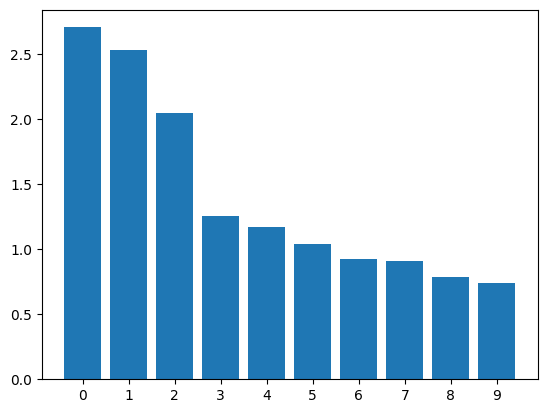

In [165]:
plt.bar(range(0,10), pca.explained_variance_)
plt.xticks(range(0,10))
plt.show()

In [166]:
X_train = X_train[:,rfe.support_]
X_test = X_test[:,rfe.support_]

### 建立模型

In [167]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [168]:
pred_y = logreg.predict(X_test)
accuracy = accuracy_score(y_test,pred_y)
print(accuracy)

0.7972727272727272
